In [14]:
import os
from pathlib import Path
import PIL
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense, Dropout,Input, Add, ReLU, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

SEED = 15

The data contains total 78200 images with 46 classes, each class contain 1700 images.
Lets first load the dataset

In [319]:
train_dir = Path('/kaggle/input/devnagri-script-classification/Data/Train/')
test_dir = Path('/kaggle/input/devnagri-script-classification/Data/Test/')

datagen = ImageDataGenerator(rescale=1./255,
                            validation_split = 0.25,
                                    fill_mode='nearest')
Target_Size = (64,64)

# Generate Train Data
train_data = datagen.flow_from_directory(
        train_dir,
        target_size=Target_Size,
        batch_size=64,
        shuffle = True,
        subset='training',
        class_mode='categorical')

# Generate Validation data
val_data = datagen.flow_from_directory(
        train_dir,
        target_size=Target_Size,
        shuffle = True,
        batch_size=64,
        subset='validation',
        class_mode='categorical')


labels = train_data.class_indices

classes = list(labels)

X,y = next(iter(train_data))

Found 58650 images belonging to 46 classes.
Found 19550 images belonging to 46 classes.


In [86]:
# Generate Test Data
test_list = tf.io.gfile.listdir('/kaggle/input/devnagri-script-classification/Data/Test/')
test_data = []
for f in test_list:
    img = tf.keras.preprocessing.image.load_img('/kaggle/input/devnagri-script-classification/Data/Test/' + f, color_mode = "rgb", target_size = Target_Size)
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img/255
    test_data.append(img)


Plotting some images and their classes

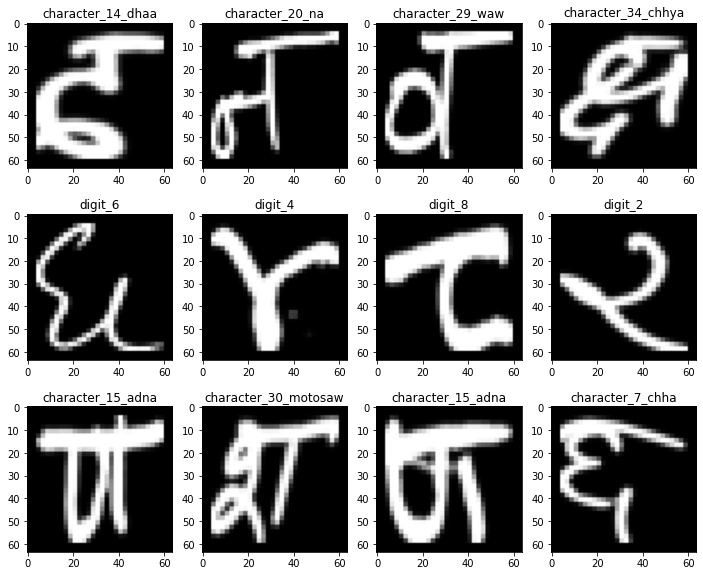

In [320]:
plt.figure(figsize = (12, 10))
for i in range(12):
    ax = plt.subplot(3,4,i+1)
    img = X[i]
    plt.imshow(img)
    plt.title(classes[y[i].argmax()])

###  ResNet

In [255]:
kernel_init = tf.keras.initializers.glorot_uniform()
bias_init = tf.keras.initializers.Constant(value=0.2)

In [142]:
def model5():
    
    inputs = Input(shape = (64,64,3))

    
    x = Conv2D(16, kernel_size = (7,7), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(inputs)
    x = Conv2D(16, kernel_size = (7,7), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = BatchNormalization()(x)
    
    x_srt = x
    
    x = Conv2D(32, kernel_size = (7,7), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = Conv2D(32, kernel_size = (5,5), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(32, kernel_size = (7,7), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = Conv2D(32, kernel_size = (5,5), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(32, kernel_size = (7,7), padding = 'same', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    
    x_srt = Conv2D(32, kernel_size = (5,5), padding = 'same', kernel_initializer = kernel_init, bias_initializer = bias_init)(x_srt)

    x = Add()([x, x_srt])
    x = ReLU()(x)
    
    x = MaxPool2D(pool_size = (2,2), strides = 2)(x)
    
    x_srt2 = x
    
    x = Conv2D(64, kernel_size = (7,7), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = Conv2D(64, kernel_size = (5,5), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(64, kernel_size = (7,7), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = Conv2D(64, kernel_size = (5,5), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = BatchNormalization()(x)

    
    x = Conv2D(64, kernel_size = (7,7), padding = 'same', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    
    x_srt2 = Conv2D(64, kernel_size = (5,5), padding = 'same', kernel_initializer = kernel_init, bias_initializer = bias_init)(x_srt2)

    x = Add()([x, x_srt2])
    x = ReLU()(x)
    
    x = MaxPool2D(pool_size = (2,2), strides = 2)(x)
    
    x_srt3 = x
    
    x = Conv2D(128, kernel_size = (7,7), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = Conv2D(128, kernel_size = (5,5), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(128, kernel_size = (7,7), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = Conv2D(128, kernel_size = (5,5), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = BatchNormalization()(x)

    
    x = Conv2D(128, kernel_size = (7,7), padding = 'same', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    
    x_srt3 = Conv2D(128, kernel_size = (5,5), padding = 'same', kernel_initializer = kernel_init, bias_initializer = bias_init)(x_srt3)
    
    x = Add()([x, x_srt3])
    x = ReLU()(x)
    
    x = MaxPool2D(pool_size = (2,2), strides = 2)(x)
    
    x_srt4 = x
    
    x = Conv2D(256, kernel_size = (7,7), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = Conv2D(256, kernel_size = (5,5), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(256, kernel_size = (7,7), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = Conv2D(256, kernel_size = (5,5), padding = 'same', activation = 'relu', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)
    x = BatchNormalization()(x)

    
    x = Conv2D(256, kernel_size = (7,7), padding = 'same', kernel_initializer = kernel_init, bias_initializer = bias_init)(x)

    x_srt4 = Conv2D(256, kernel_size = (5,5), padding = 'same', kernel_initializer = kernel_init, bias_initializer = bias_init)(x_srt4)
    
    x = Add()([x, x_srt4])
    x = ReLU()(x)
    
    x = GlobalAveragePooling2D()(x)
    
    x = Flatten()(x)
    
    x = Dense(256, activation = 'relu')(x)
    outputs = Dense(46, activation = 'softmax')(x)
    
    
    model = Model(inputs = inputs, outputs = outputs)
    
    return model
    

In [143]:
model5 = model5()
model5.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_209 (Conv2D)             (None, 64, 64, 16)   2368        input_9[0][0]                    
__________________________________________________________________________________________________
conv2d_210 (Conv2D)             (None, 64, 64, 16)   12560       conv2d_209[0][0]                 
__________________________________________________________________________________________________
batch_normalization_87 (BatchNo (None, 64, 64, 16)   64          conv2d_210[0][0]                 
______________________________________________________________________________________________

In [278]:
model5.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history5 = model5.fit(train_data, validation_data=val_data, epochs=20, callbacks=callback, shuffle = True)

Epoch 1/20
917/917 [==============================] - 116s 124ms/step - loss: 0.0293 - accuracy: 0.9921 - val_loss: 0.2997 - val_accuracy: 0.9367
Epoch 2/20
917/917 [==============================] - 114s 124ms/step - loss: 0.0230 - accuracy: 0.9933 - val_loss: 0.2593 - val_accuracy: 0.9415
Epoch 3/20
917/917 [==============================] - 113s 123ms/step - loss: 0.0200 - accuracy: 0.9943 - val_loss: 0.3275 - val_accuracy: 0.9331
Epoch 4/20
917/917 [==============================] - 113s 123ms/step - loss: 0.0186 - accuracy: 0.9948 - val_loss: 0.2857 - val_accuracy: 0.9458
Epoch 5/20
917/917 [==============================] - 113s 123ms/step - loss: 0.0198 - accuracy: 0.9946 - val_loss: 0.2743 - val_accuracy: 0.9439
Epoch 6/20
917/917 [==============================] - 113s 124ms/step - loss: 0.0163 - accuracy: 0.9955 - val_loss: 0.2694 - val_accuracy: 0.9507
Epoch 7/20
917/917 [==============================] - 114s 124ms/step - loss: 0.0169 - accuracy: 0.9956 - val_loss: 0.3518 -

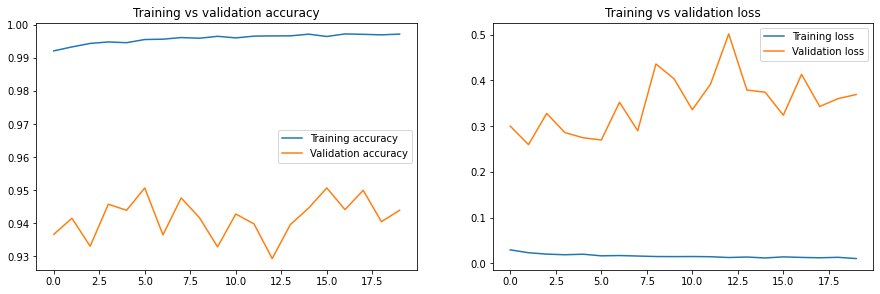

In [279]:
accuracy = history5.history['accuracy']
val_accuracy  = history5.history['val_accuracy']

loss = history5.history['loss']
val_loss = history5.history['val_loss']

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [192]:
pred_5 = model5.predict(tf.convert_to_tensor(test_data))

In [193]:
pred_5

array([[2.48549133e-11, 3.18755135e-12, 2.23512348e-10, ...,
        4.93520884e-11, 3.02344250e-13, 6.21552462e-12],
       [2.37441387e-13, 2.86311165e-17, 1.69194614e-13, ...,
        8.50358466e-14, 8.87376945e-18, 2.85971796e-16],
       [4.70525909e-27, 1.97636529e-22, 1.85628471e-28, ...,
        1.46598622e-19, 2.48143266e-23, 2.74229814e-12],
       ...,
       [3.11802290e-23, 4.44437686e-27, 1.81903378e-21, ...,
        9.57240728e-22, 6.46220339e-23, 6.29923179e-22],
       [9.09410486e-15, 9.43878321e-23, 3.56909984e-20, ...,
        5.58403420e-19, 7.59249033e-17, 8.33477575e-17],
       [1.50275832e-06, 7.29031857e-09, 1.67164416e-08, ...,
        2.89542555e-07, 1.03827915e-04, 2.68506284e-07]], dtype=float32)

In [194]:
pred__5 = np.argmax(pred_5, axis = 1)
pred__5

array([30, 30, 37, ..., 40, 23, 13])

In [185]:
labels_class = dict([(key, value) for key, value in labels.items()])
labels_class

{0: 'character_10_yna',
 1: 'character_11_taamatar',
 2: 'character_12_thaa',
 3: 'character_13_daa',
 4: 'character_14_dhaa',
 5: 'character_15_adna',
 6: 'character_16_tabala',
 7: 'character_17_tha',
 8: 'character_18_da',
 9: 'character_19_dha',
 10: 'character_1_ka',
 11: 'character_20_na',
 12: 'character_21_pa',
 13: 'character_22_pha',
 14: 'character_23_ba',
 15: 'character_24_bha',
 16: 'character_25_ma',
 17: 'character_26_yaw',
 18: 'character_27_ra',
 19: 'character_28_la',
 20: 'character_29_waw',
 21: 'character_2_kha',
 22: 'character_30_motosaw',
 23: 'character_31_petchiryakha',
 24: 'character_32_patalosaw',
 25: 'character_33_ha',
 26: 'character_34_chhya',
 27: 'character_35_tra',
 28: 'character_36_gya',
 29: 'character_3_ga',
 30: 'character_4_gha',
 31: 'character_5_kna',
 32: 'character_6_cha',
 33: 'character_7_chha',
 34: 'character_8_ja',
 35: 'character_9_jha',
 36: 'digit_0',
 37: 'digit_1',
 38: 'digit_2',
 39: 'digit_3',
 40: 'digit_4',
 41: 'digit_5',
 

In [188]:
pred5 = list(map(labels_class.get, pred__5))

### MobileNet

In [205]:
from tensorflow.keras.layers import DepthwiseConv2D

In [225]:
def expansion_block(x,t,filters,block_id):
    prefix = 'block_{}_'.format(block_id)
    total_filters = t*filters
    x = Conv2D(total_filters,1,padding='same',use_bias=False, kernel_initializer = kernel_init, name = prefix +'expand')(x)
    x = BatchNormalization(name=prefix +'expand_bn')(x)
    x = ReLU(name = prefix +'expand_relu')(x)
    return x

def depthwise_block(x,stride,block_id):
    prefix = 'block_{}_'.format(block_id)
    x = DepthwiseConv2D(3,strides=(stride,stride),padding ='same', kernel_initializer = kernel_init, use_bias = False, name = prefix + 'depthwise_conv')(x)
    x = BatchNormalization(name=prefix +'dw_bn')(x)
    x = ReLU(name=prefix +'dw_relu')(x)
    return x

def projection_block(x,out_channels,block_id):
    prefix = 'block_{}_'.format(block_id)
    x = Conv2D(filters = out_channels,kernel_size = 1,padding='same',use_bias=False, kernel_initializer = kernel_init,name= prefix + 'compress')(x)
    x = BatchNormalization(name=prefix +'compress_bn')(x)
    return x

In [226]:
def Bottleneck(x,t,filters, out_channels,stride,block_id):
    y = expansion_block(x,t,filters,block_id)
    y = depthwise_block(y,stride,block_id)
    y = projection_block(y, out_channels,block_id)
    if y.shape[-1]==x.shape[-1]:
        y = Add()([x,y])
    return y

In [230]:
def Model6():
    inputs = Input(shape = (64,64,3))

    x = Conv2D(32,kernel_size=3,strides=(2,2),padding = 'same', kernel_initializer = kernel_init)(inputs)
    x = BatchNormalization(name='conv1_bn')(x)
    x = ReLU(6, name = 'conv1_relu')(x)

    # 13 Bottlenecks

    x = depthwise_block(x,stride=1,block_id=1)
    x = projection_block(x, out_channels=16,block_id=1)

    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 24, stride = 2,block_id = 2)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 24, stride = 1,block_id = 3)

    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 32, stride = 2,block_id = 4)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 32, stride = 1,block_id = 5)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 32, stride = 1,block_id = 6)

    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 2,block_id = 7)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 1,block_id = 8)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 1,block_id = 9)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 1,block_id = 10)

    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 96, stride = 1,block_id = 11)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 96, stride = 1,block_id = 12)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 96, stride = 1,block_id = 13)


    #1*1 conv
    x = Conv2D(filters = 1280,kernel_size = 1,padding='same',use_bias=False, name = 'last_conv')(x)
    x = BatchNormalization(name='last_bn')(x)
    x = ReLU(6,name='last_relu')(x)

    #AvgPool 7*7
    x = GlobalAveragePooling2D(name='global_average_pool')(x)
    
    x = Dense(2048, activation = 'relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(1024, activation = 'relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(512, activation = 'relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation = 'relu')(x)

    output = Dense(n_classes,activation='softmax')(x)

    model = Model(inputs, output)

    return model

In [233]:
model6 = Model6()
model6.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_248 (Conv2D)             (None, 32, 32, 32)   896         input_23[0][0]                   
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 32, 32, 32)   128         conv2d_248[0][0]                 
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 32, 32, 32)   0           conv1_bn[0][0]                   
____________________________________________________________________________________________

In [234]:
model6.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history6 = model6.fit(train_data, validation_data=val_data, epochs=10, callbacks=callback, shuffle = True)

Epoch 1/10
917/917 [==============================] - 115s 122ms/step - loss: 1.6912 - accuracy: 0.4783 - val_loss: 0.9632 - val_accuracy: 0.7334
Epoch 2/10
917/917 [==============================] - 105s 115ms/step - loss: 0.3670 - accuracy: 0.8944 - val_loss: 0.6301 - val_accuracy: 0.8357
Epoch 3/10
917/917 [==============================] - 105s 114ms/step - loss: 0.2189 - accuracy: 0.9411 - val_loss: 0.5108 - val_accuracy: 0.8775
Epoch 4/10
917/917 [==============================] - 104s 113ms/step - loss: 0.1730 - accuracy: 0.9559 - val_loss: 0.5346 - val_accuracy: 0.8767
Epoch 5/10
917/917 [==============================] - 104s 113ms/step - loss: 0.1488 - accuracy: 0.9620 - val_loss: 0.4558 - val_accuracy: 0.8919
Epoch 6/10
917/917 [==============================] - 103s 113ms/step - loss: 0.1340 - accuracy: 0.9666 - val_loss: 0.4370 - val_accuracy: 0.9029
Epoch 7/10
917/917 [==============================] - 105s 115ms/step - loss: 0.1242 - accuracy: 0.9692 - val_loss: 0.3946 -

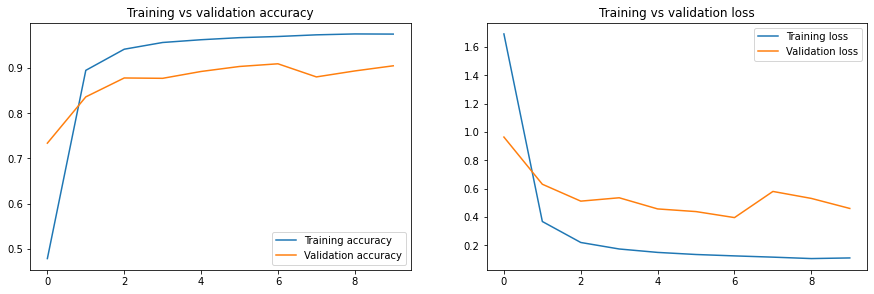

In [235]:
accuracy = history6.history['accuracy']
val_accuracy  = history6.history['val_accuracy']

loss = history6.history['loss']
val_loss = history6.history['val_loss']

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [236]:
pred_6 = model6.predict(tf.convert_to_tensor(test_data))
pred6 = np.argmax(pred_6, axis = 1)
pred6

array([30, 30, 37, ..., 40, 23, 13])

In [ ]:
labels_class = dict([(key, value) for key, value in labels.items()])
pred6 = list(map(labels_class.get, final))
result = pd.DataFrame({'id': test_list,'category': pred6})
result.to_csv('result8.csv',index= False)
result

In [245]:
pred_6

array([[9.8249053e-09, 1.4801580e-07, 2.2420402e-07, ..., 1.4833452e-08,
        6.8994655e-07, 1.5062291e-06],
       [4.9271676e-13, 4.3501053e-11, 5.1891446e-11, ..., 1.8373111e-12,
        2.5329563e-10, 1.0062696e-09],
       [1.3194519e-17, 3.0911985e-11, 3.6522192e-12, ..., 6.3589860e-14,
        1.5016170e-13, 5.0337555e-12],
       ...,
       [6.6611994e-26, 2.3714770e-17, 6.2311005e-20, ..., 6.3475002e-14,
        2.1042284e-17, 5.8815570e-27],
       [1.3548460e-23, 3.8304926e-25, 3.4774118e-15, ..., 1.5446960e-20,
        1.8202279e-21, 3.4961761e-17],
       [3.6914170e-24, 4.6450860e-20, 1.9095641e-12, ..., 5.8929393e-21,
        2.5233482e-15, 1.1111039e-23]], dtype=float32)

###  AlexNet

In [274]:
def model7():
    
    model = Sequential([
    Conv2D(filters=96, kernel_size=(10,10), activation='relu', input_shape=(64,64,3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=256, kernel_size=(5,5), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=384, kernel_size=(3,3), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=384, kernel_size=(3,3), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(2048, activation='relu'),
    Dropout(0.5),
    Dense(2048, activation='relu'),
    Dropout(0.5),
    Dense(46, activation='softmax')
])
    
    return model

In [275]:
model7 = model7()
model7.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_321 (Conv2D)          (None, 55, 55, 96)        28896     
_________________________________________________________________
batch_normalization_101 (Bat (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_322 (Conv2D)          (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_102 (Bat (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_323 (Conv2D)          (None, 13, 13, 384)     

In [276]:
model7.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history7 = model7.fit(train_data, validation_data=val_data, epochs=10, callbacks=callback, shuffle = True)

Epoch 1/10
917/917 [==============================] - 58s 62ms/step - loss: 1.5919 - accuracy: 0.6311 - val_loss: 0.6758 - val_accuracy: 0.8217
Epoch 2/10
917/917 [==============================] - 56s 61ms/step - loss: 0.5130 - accuracy: 0.8753 - val_loss: 0.5627 - val_accuracy: 0.8634
Epoch 3/10
917/917 [==============================] - 56s 62ms/step - loss: 0.3653 - accuracy: 0.9172 - val_loss: 0.5575 - val_accuracy: 0.8584
Epoch 4/10
917/917 [==============================] - 56s 61ms/step - loss: 0.2823 - accuracy: 0.9383 - val_loss: 0.3865 - val_accuracy: 0.9101
Epoch 5/10
917/917 [==============================] - 57s 62ms/step - loss: 0.2327 - accuracy: 0.9498 - val_loss: 0.3680 - val_accuracy: 0.9218
Epoch 6/10
917/917 [==============================] - 55s 60ms/step - loss: 0.1818 - accuracy: 0.9607 - val_loss: 0.4476 - val_accuracy: 0.8955
Epoch 7/10
917/917 [==============================] - 55s 60ms/step - loss: 0.1723 - accuracy: 0.9647 - val_loss: 0.3412 - val_accuracy:

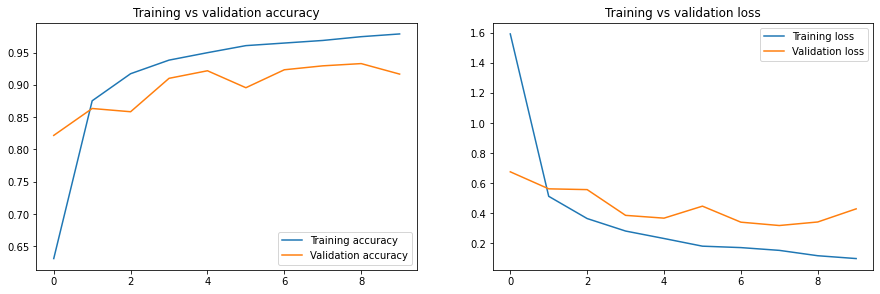

In [277]:
accuracy = history7.history['accuracy']
val_accuracy  = history7.history['val_accuracy']

loss = history7.history['loss']
val_loss = history7.history['val_loss']

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [280]:
pred_7 = model7.predict(tf.convert_to_tensor(test_data))
pred7 = np.argmax(pred_7, axis = 1)
pred7

array([30, 30, 37, ..., 40, 23, 13])

### DenseNet

In [307]:
from tensorflow.keras.layers import concatenate, AvgPool2D
import tensorflow.keras.backend as K

In [308]:
def model8(filters = 32):
    
    #batch norm + relu + conv
    def bn_rl_conv(x,filters,kernel=1,strides=1):
        
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(filters, kernel, strides=strides,padding = 'same')(x)
        return x
    
    def dense_block(x, repetition):
        
        for _ in range(repetition):
            y = bn_rl_conv(x, 4*filters)
            y = bn_rl_conv(y, filters, 3)
            x = concatenate([y,x])
        return x
        
    def transition_layer(x):
        
        x = bn_rl_conv(x, K.int_shape(x)[-1] //2 )
        x = AvgPool2D(2, strides = 2, padding = 'same')(x)
        return x
    
    inputs = Input (shape = (64,64,3))
    
    x = Conv2D(64, 7, padding = 'same')(inputs)
    x = MaxPool2D(3, strides = 1, padding = 'same')(x)
    
    for repetition in [6,12,24,16]:
        
        d = dense_block(x, repetition)
        x = transition_layer(d)
        
    x = GlobalAveragePooling2D()(d)
    
    output = Dense(46, activation = 'softmax')(x)
    
    model = Model(inputs, output)
    return model

In [309]:
model8 = model8()
model8.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_36 (InputLayer)           [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_361 (Conv2D)             (None, 64, 64, 64)   9472        input_36[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_78 (MaxPooling2D) (None, 64, 64, 64)   0           conv2d_361[0][0]                 
__________________________________________________________________________________________________
batch_normalization_135 (BatchN (None, 64, 64, 64)   256         max_pooling2d_78[0][0]           
___________________________________________________________________________________________

Due to less time, could only train 1 epoch.

In [314]:
model8.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history8 = model8.fit(train_data, validation_data=val_data, epochs=1, callbacks=callback, shuffle = True)

917/917 [==============================] - 441s 469ms/step - loss: 0.0904 - accuracy: 0.9770 - val_loss: 1.0812 - val_accuracy: 0.8198


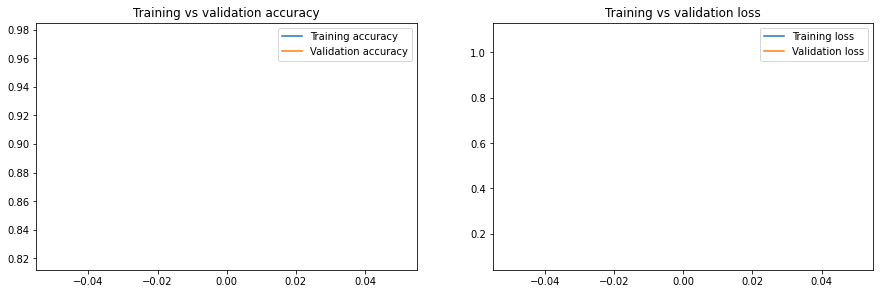

In [318]:
accuracy = history8.history['accuracy']
val_accuracy  = history8.history['val_accuracy']

loss = history8.history['loss']
val_loss = history8.history['val_loss']

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [315]:
pred_8 = model8.predict(tf.convert_to_tensor(test_data))
pred8 = np.argmax(pred_8, axis = 1)
pred8

array([30, 17, 37, ..., 40, 23, 13])

### Ensembling

In [316]:
fiin = 0.35 * (pred_5 + pred_7) + 0.15 * (pred_8 + pred_6)
pred10 = np.argmax(fiin, axis = 1)
pred10

array([30, 30, 37, ..., 40, 23, 13])

In [317]:
labels_class = dict([(key, value) for key, value in labels.items()])
pred10 = list(map(labels_class.get, pred10))
result = pd.DataFrame({'id': test_list,'category': pred10})
result.to_csv('result10.csv',index= False)
result

,id,category
0,9273.png,character_4_gha
1,9292.png,character_4_gha
2,11396.png,digit_1
3,4353.png,character_23_ba
4,7968.png,character_34_chhya
...,...,...
13795,304.png,character_11_taamatar
13796,5562.png,character_27_ra
13797,12060.png,digit_4
13798,7013.png,character_31_petchiryakha
